In [8]:
import  keras
from tensorflow.keras.models import Sequential #initialized the nural network#create cnn for 2d here image is 2d ,but video is 3d
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense #layer fully connected ann 
 

In [9]:
#initialization the CNN
classifier=Sequential()

#step-1 Convolution
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))#32 filte ,3 row and column
#input_shape 64 x 64 image 3 no of channel

#Step 2 - pooling  #reduce array size 
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Adding a second convolution layer #not execute it's next
classifier.add(Conv2D(32,(3,3),activation='relu'))#32 filte ,3 row and column
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step -3 Flatten #covrt 2d array to 1d
classifier.add(Flatten())
 
#Step 4 full connection
#adding hidden layer
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [10]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [11]:
#Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Part -2 Fitting the CNN to the images


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,

        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_set = test_datagen.flow_from_directory(
        'validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [20]:
test_data = test_datagen.flow_from_directory(
        'validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 640 images belonging to 2 classes.


In [13]:
path ='C:\\Users\\DelowaR\\jupyder\\project_cse_3200\\combind_image\\'
hist = classifier.fit_generator(
        training_set,
        steps_per_epoch=163,
        epochs=100,
        validation_data=validation_set,
        validation_steps=20)


classifier.save(path+'xray_train_model.h5');
classifier.save_weights(path +'resul_train_model.h5');
classifier.save(path +'xray_train.json')
classifier.save_weights(path + 'xray_train_weight.json')

Epoch 1/100
163/163 [==============================] - 119s 731ms/step - loss: 0.3391 - accuracy: 0.8512 - val_loss: 0.3538 - val_accuracy: 0.8422
Epoch 2/100
163/163 [==============================] - 87s 532ms/step - loss: 0.2362 - accuracy: 0.9039 - val_loss: 0.3446 - val_accuracy: 0.8625
Epoch 3/100
163/163 [==============================] - 86s 526ms/step - loss: 0.1943 - accuracy: 0.9225 - val_loss: 0.3744 - val_accuracy: 0.8484
Epoch 4/100
163/163 [==============================] - 85s 522ms/step - loss: 0.1765 - accuracy: 0.9316 - val_loss: 0.5101 - val_accuracy: 0.8047
Epoch 5/100
163/163 [==============================] - 85s 522ms/step - loss: 0.1832 - accuracy: 0.9271 - val_loss: 0.3521 - val_accuracy: 0.8516
Epoch 6/100
163/163 [==============================] - 85s 520ms/step - loss: 0.1808 - accuracy: 0.9250 - val_loss: 0.3401 - val_accuracy: 0.8891
Epoch 7/100
163/163 [==============================] - 86s 526ms/step - loss: 0.1537 - accuracy: 0.9413 - val_loss: 0.3574 

Epoch 57/100
163/163 [==============================] - 86s 527ms/step - loss: 0.0608 - accuracy: 0.9774 - val_loss: 0.2928 - val_accuracy: 0.9000
Epoch 58/100
163/163 [==============================] - 86s 527ms/step - loss: 0.0529 - accuracy: 0.9820 - val_loss: 0.4985 - val_accuracy: 0.8703
Epoch 59/100
163/163 [==============================] - 86s 528ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.3812 - val_accuracy: 0.9000
Epoch 60/100
163/163 [==============================] - 86s 527ms/step - loss: 0.0609 - accuracy: 0.9781 - val_loss: 0.3053 - val_accuracy: 0.9156
Epoch 61/100
163/163 [==============================] - 86s 526ms/step - loss: 0.0555 - accuracy: 0.9804 - val_loss: 0.2878 - val_accuracy: 0.9187
Epoch 62/100
163/163 [==============================] - 86s 525ms/step - loss: 0.0586 - accuracy: 0.9758 - val_loss: 0.2674 - val_accuracy: 0.9156
Epoch 63/100
163/163 [==============================] - 86s 528ms/step - loss: 0.0459 - accuracy: 0.9841 - val_loss: 0

In [21]:
# evaluate the model
scores = classifier.evaluate_generator(test_data)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))


accuracy: 90.31%


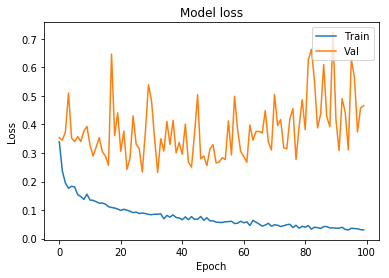

In [18]:
#visualization _Graph showing model training loss and validation loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [17]:
#visualization _ Graph showing model training and validation accuracy
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>